### RESPUESTA A LA TAREA SECCION 6

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
print(os.getcwd())

h:\Ejercicios Python\CERTIFICADO IBM


In [3]:
os.chdir("H:\\Curso IBM sobre IA\\Archivos para Data Science")

In [23]:
peliculas = pd.read_csv('H:\\Curso IBM sobre IA\\Archivos para Data Science\\TareaDatos.csv', encoding='latin-1')

In [24]:
peliculas.head()

,Dia de la Semana,Director,Genero,Pelicula,Dia Lanzamiento,Estudio,Ingreso Bruto Ajustado ($mill),Presupuesto ($mill),Ingreso Bruto ($mill),Rating IMDB,Rating MovieLens,Ingresos Fuera de Estados Unidos ($mill),Ingresos Fuera de Estados Unidos %,Utilidad ($mill),Utilidad %,Duracion (min),Ingresos USA ($mill),Ingresos % USA
0,Friday,Brad Bird,accion,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,accion,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,accion,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedia,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,accion,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [31]:
peliculas.columns = ['DiaSemana', 'Director', 'Genero', 'Pelicula', 'DiaLanzamiento', 'Estudio', 'IngresoBrutoAjustado', 'PresumuestoMillones', 'IngresoBruto', 'RatingIMDB', 'RatingMovieLens','IngFueraUSAMillones', 'IngFueraUSA%', 'UtilidadMillones', 'Utilidad%', 'DuracionMinutos', 'IngUSAMillones', 'Ing%USA']

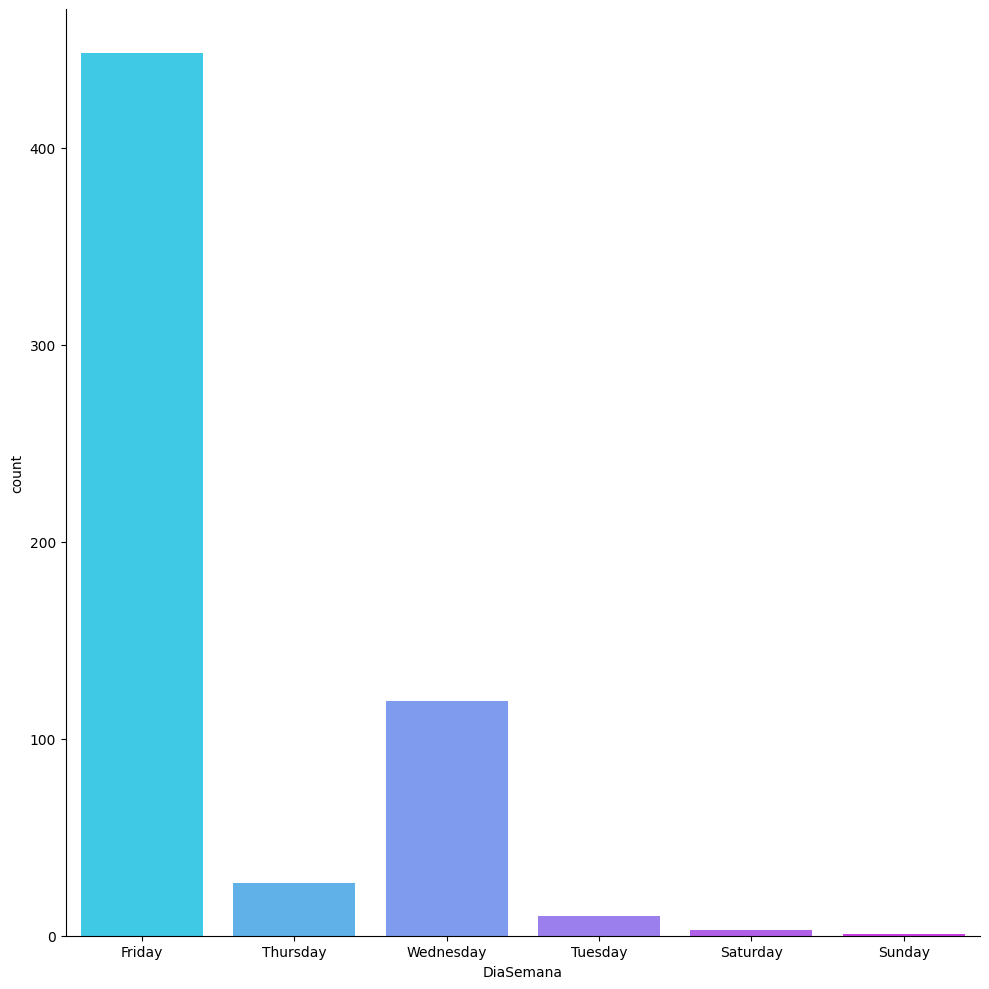

In [33]:
vis1 = sns.catplot(data=peliculas, x='DiaSemana', kind='count', height=10, palette='cool' )

In [34]:
peliculas.Estudio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [36]:
len(peliculas.Estudio.unique())

36

In [42]:
peliculas.Genero.unique()

array(['accion', 'comedia', 'aventura', 'terror', 'animacion',
       'biografia', 'drama', 'musical', 'ciencia ficcion', 'crimen',
       'romantica', 'fantasia', 'misterio', 'suspenso', 'documental'],
      dtype=object)

In [43]:
len(peliculas.Genero.unique())

15

In [44]:
peliculas2 = peliculas[(peliculas.Genero == 'Comedia') | (peliculas.Genero == 'accion')]
filtro_generos = ['accion', 'aventura', 'animacion', 'comedia', 'drama']
peliculas2 = peliculas[peliculas.Genero.isin(filtro_generos)]

In [45]:
peliculas2.Genero.unique()

array(['accion', 'comedia', 'aventura', 'animacion', 'drama'],
      dtype=object)

In [46]:
filtro_estudios = ['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'Sony', 'Universal', 'WB']
peliculas3 = peliculas2[peliculas2.Estudio.isin(filtro_estudios)]

In [47]:
peliculas3.Estudio.unique()

array(['Buena Vista Studios', 'Sony', 'Universal', 'WB',
       'Paramount Pictures', 'Fox'], dtype=object)

In [48]:
peliculas3.Genero.unique()

array(['accion', 'comedia', 'aventura', 'animacion', 'drama'],
      dtype=object)

In [49]:
len(peliculas3)

423

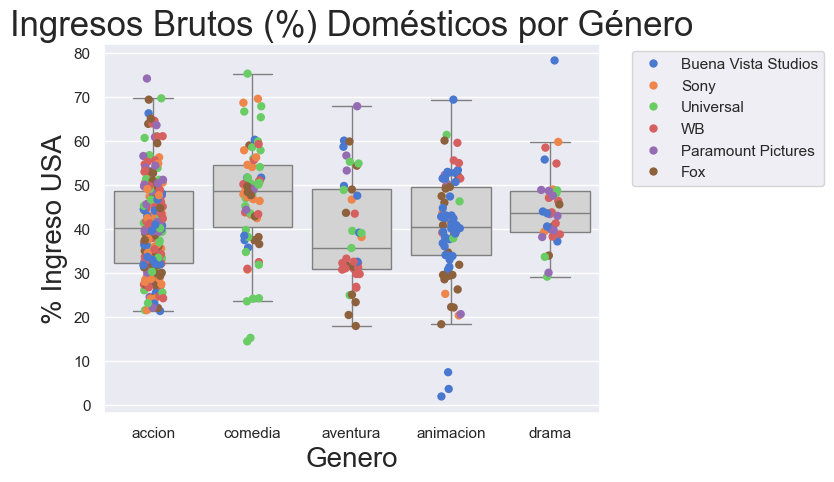

In [56]:
sns.set_theme(style='darkgrid', palette='muted', color_codes=True)
ax = sns.boxplot(data=peliculas3, x='Genero', y='Ing%USA', \
                orient='v', color='lightgray', showfliers=False )
plt.setp(ax.artists, alpha=0.5)
sns.stripplot(data=peliculas3, x='Genero', y='Ing%USA', jitter=True, size=6, linewidth=0, hue='Estudio')

ax.axes.set_title('Ingresos Brutos (%) Domésticos por Género', fontsize=25)
ax.set_xlabel('Genero', fontsize=20)
ax.set_ylabel('% Ingreso USA', fontsize=20)
ax.legend(bbox_to_anchor=(1.05,1), loc=2)